In [389]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Visualización de la Información - Tarea 5
**Andrés Urbano Guillermo Gerardo**

El hundimiento del Titanic es uno de los naufragios más infames de la historia. Esta es la descripción de las variables de nuestro conjunto de datos.

|Caracteristica| Descripcion|
|---|---|
pclass|Clase del pasajero|
|survived|Indica si sobrevivio (0 = No; 1 = Sí)|
|name|Nombre|
|sex|Una variable categorica de hombre y mujer|
|age|edad en años|
|sibsp|Número de hermanos/cónyuges a bordo|
|parch|Número de padres/niños a bordo|
|ticket|Numero de ticket|
|fare|Tarifa de pasajero|
|cabin|Cabina|
|embarked|El lugar donde embarcaron (Cherbourg, Queenstowny Southampton)|
|boat|Bote salvavidas|
|body|Número de identificación del cuerpo|
|home.dest|Inicio/Destino|

In [390]:
data = pd.read_csv('data/titanic3.csv')
data.tail()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3,0,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.8750,NaN,S,NaN,NaN,NaN


i) ¿Cuántos cuerpos fueron encontrados?

Para conocer la cantidad de cuerpos encontrados dado nuestro conjunto datos debemos de filtrar la columna body.

In [391]:
body_found = data.body.dropna()
print(f"Cantidad de cuerpos encontrados: {len(body_found)}")

Cantidad de cuerpos encontrados: 121


Tambien podriamos conocer la cantidad de personas que sobrevieron y que en clase pertenecian:

In [392]:
survived_people = data[data.survived == 1]
no_survived_people = data[data.survived == 0]
print(f"Total de personas encontradas {len(survived_people)}")

Total de personas encontradas 500


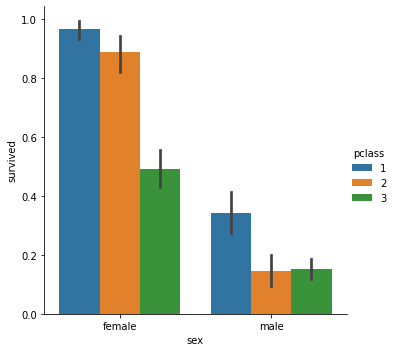

In [393]:
sns.catplot(data=data, kind="bar", x="sex", y="survived", hue="pclass")

ii) ¿Cuántos de ellos fueron hombres
mayores a cuarenta años?

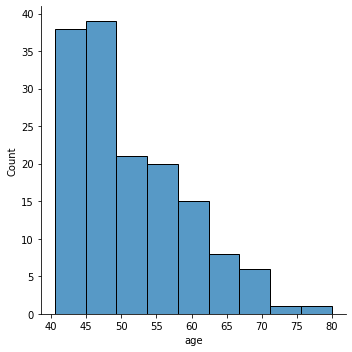

In [394]:
#  Filtramos por edad y sexo
male_40 = data[(data.age > 40) & (data.sex == "male")]
sns.displot(data=male_40, x="age")

 iii) ¿Cuantas mujeres desaparecieron entre las edades de 15 a 35
años?
Para deternmiar las mujeres que desaparecieron es encontrar la cantidad de personas que no sobrevivieron en el accidente:

In [395]:
missing_woman = data[(data.sex == "female") & (data.age >= 15) & (data.age <= 35) & (data.survived == 0)]
print(f"Total de mujeres desaparecidas {len(missing_woman)}")

Total de mujeres desaparecidas 55


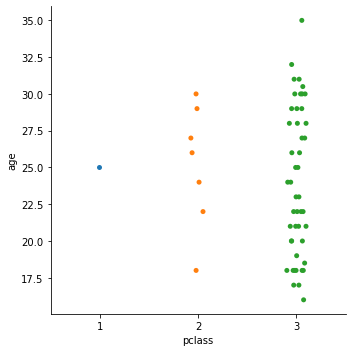

In [396]:
sns.catplot(x="pclass", y="age", data=missing_woman)

Por otra parte, tambien podemos conocer las mujeres que no encontraron sus cuerpos.

In [397]:
not_found_woman = missing_woman.body.fillna("Cuerpos no encontrados")
not_found_woman = not_found_woman[not_found_woman == "Cuerpos no encontrados"]
print(f"Mujeres que desaparecieron entre las edades de 15 a 35 años:  {len(not_found_woman)}")

Mujeres que desaparecieron entre las edades de 15 a 35 años:  51


iv) ¿Cuantos hombres mayores a 20 años sobrevivieron?

In [398]:
men_20 = data[(data.age > 20) & (data.survived == 1)]
print(f"Total de hombres mayores de 20 que sobrevivieron: {len(men_20)}")

Total de hombres mayores de 20 que sobrevivieron: 313


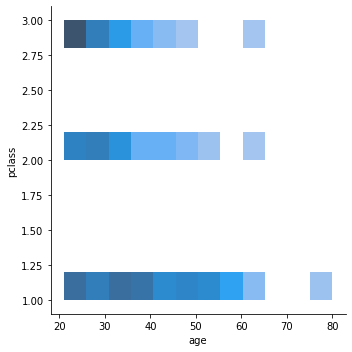

In [399]:
sns.displot(men_20, x="age", y="pclass")

v) ¿Cuantas mujeres
menores a 25 años sobrevivieron?.

In [400]:
woman_25 = data[(data.age > 25) & (data.survived == 1)]
print(f"Total de mujeres mayores de 25 que sobrevivieron: {len(men_20)}")

Total de mujeres mayores de 25 que sobrevivieron: 313


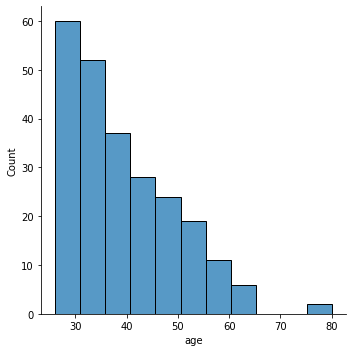

In [401]:
sns.displot(woman_25, x="age")

Además, Genere una copia del conjunto de datos y rellene los datos faltantes (NA's) con
un valor de 0 en el caso de datos numéricos usados como identificador la palabra
“desconocido" en el caso de datos tipo cadena de caracteres y en el caso de variables
numéricas use el promedio de los valores de esa columna (p.ej., la edad y la tarifa)

In [402]:
# Generamos  una copia del conjunto de datos originales
data_cp = data.copy()
# Ver el número de elementos faltantes
print(data_cp.isnull().sum())

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64


In [403]:
def fill_NA(data, columns_names, values):
    """Rellena los NA del dataframe original"""
    for column_name, value in zip(columns_names, values):
        # Por paso de referencia actualizaremos el dataframe
        data[column_name] = data[column_name].fillna(value)

In [404]:
# Para variables numericas 0
columns_names = ["body", "boat"]
fill_NA(data_cp, colums_names, [0,0])
data_cp[columns_names].head(5)
# “desconocido" en el caso de datos tipo cadena de caracteres
columns_names = ['home.dest', 'embarked', 'cabin']
fill_NA(data_cp, columns_names, ["desconocido"]*3)
# promedio de los valores para age y fare
columns_names = ['age', 'fare']
age_mean = data.age.mean()
fare_mean = data.fare.mean()
fill_NA(data_cp, columns_names, [age_mean, fare_mean])

In [405]:
# Vemos nuevamente el número de elementos faltantes
print(data_cp.isnull().sum())

pclass       0
survived     0
name         0
sex          0
age          0
sibsp        0
parch        0
ticket       0
fare         0
cabin        0
embarked     0
boat         0
body         0
home.dest    0
dtype: int64


In [406]:
data_cp.tail()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1304,3,0,"Zabour, Miss. Hileni",female,14.500000,1,0,2665,14.4542,desconocido,C,0,328.0,desconocido
1305,3,0,"Zabour, Miss. Thamine",female,29.881135,1,0,2665,14.4542,desconocido,C,0,0.0,desconocido
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.500000,0,0,2656,7.2250,desconocido,C,0,304.0,desconocido
1307,3,0,"Zakarian, Mr. Ortin",male,27.000000,0,0,2670,7.2250,desconocido,C,0,0.0,desconocido
1308,3,0,"Zimmerman, Mr. Leo",male,29.000000,0,0,315082,7.8750,desconocido,S,0,0.0,desconocido


## Normalización y Estandarización

Finalmente, de los campos “age” y “fare” agregue columnas al conjunto de datos qué
contengan los valores normalizados.

In [407]:
data_cp['age_norm'] = (data_cp['age'] - data.age.mean() ) / (data.age.std())

data_cp['fare_norm2'] = (data_cp['fare'] - np.min(data.fare)) / (np.max(data.fare) - np.min(data.fare))

data_cp.tail(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_norm,fare_norm2
1304,3,0,"Zabour, Miss. Hileni",female,14.500000,1,0,2665,14.4542,desconocido,C,0,328.0,desconocido,-1.067134,0.028213
1305,3,0,"Zabour, Miss. Thamine",female,29.881135,1,0,2665,14.4542,desconocido,C,0,0.0,desconocido,0.000000,0.028213
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.500000,0,0,2656,7.2250,desconocido,C,0,304.0,desconocido,-0.234581,0.014102
1307,3,0,"Zakarian, Mr. Ortin",male,27.000000,0,0,2670,7.2250,desconocido,C,0,0.0,desconocido,-0.199891,0.014102
1308,3,0,"Zimmerman, Mr. Leo",male,29.000000,0,0,315082,7.8750,desconocido,S,0,0.0,desconocido,-0.061133,0.015371


b) Utilizando el archivo “movies.csv” construya una o varias funciones qué
permitan calcular una matriz de distancias para los datos numéricos en el dataFrame. La
función debe permitir construir la matriz de distancia usando las distancias de Manhattan,
Euclideana y de Minkowski (para p igual a 3).

In [408]:
import plotly as py
import sympy as sp
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from scipy.spatial import distance_matrix

In [409]:
movies_df = pd.read_csv("data/movies.csv", sep=";")
movies_df

,user_id,star_wars,lord_of_the_rings,harry_potter
0,1,1.2,4.9,2.1
1,2,2.1,8.1,7.9
2,3,7.4,3.0,9.9
3,4,5.6,0.5,1.8
4,5,1.5,8.3,2.6
5,6,2.5,3.7,6.5
6,7,2.0,8.2,8.5
7,8,1.8,9.3,4.5
8,9,2.6,1.7,3.1
9,10,1.5,4.7,2.3


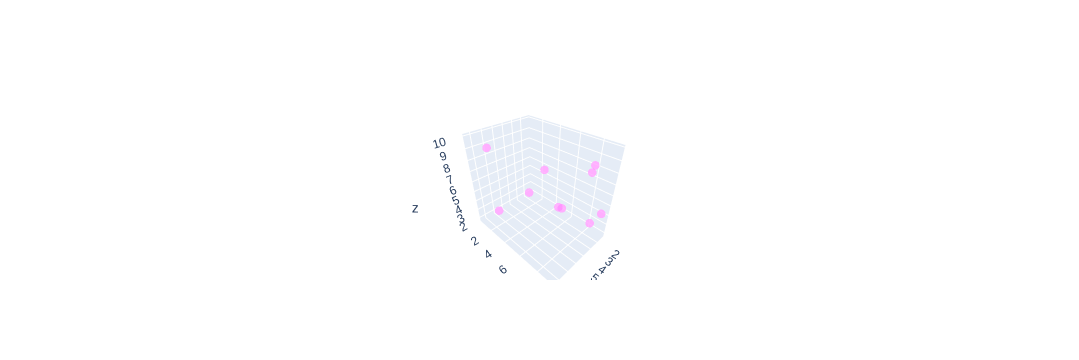

In [410]:
# Iris-setosa
movies_3d = go.Scatter3d(
                        x = movies_df['star_wars'],
                        y = movies_df['lord_of_the_rings'],
                        z = movies_df['harry_potter'],
                        mode = 'markers',
                        opacity = 0.7,
                        name = "Movies",
                        marker = dict(
                                    size = 5,
                                    color = 'rgba(255,102, 255,0.8)')
)
movies_3d = [movies_3d]
fig_3d = go.Figure(data = movies_3d)
iplot(movies_3d)

Ya que nuestro conjunto de datos no tiene una adecuada descripción del significado de los valores de las columnas, podemos inferir que cada valor es el grado de satisfaccion de cada usuario respecto a cada pelicual. Viendo nuestro grafico en 3D podemos ver hay usuarios con la misma opinion viendo las distancias entre los puntos, para ser más precicos sacaremos la matriz de distancias.

In [411]:
def distancia_euclidiana(a, b):
    """Calcula la distancia euclidiana,
    
    Arguments
    p - una tupla que será el primer punto.
    q - una tupla que será el segundo punto.
    
    Return    
    Regresa un entero con la distancia entre los puntos.
    """ 
    # Convertimos los puntos en vectores de numpy
    p1 = np.array(a)
    p2 = np.array(b)
    return np.sqrt(np.sum((p1-p2)**2))    

def distancia_manhattan(a, b):
    """Calcula la distancia manhattan,
    
    Arguments
    p - una tupla que será el primer punto.
    q - una tupla que será el segundo punto.
    
    Return    
    Regresa un entero con la distancia entre los puntos.
    """ 
    # Convertimos los puntos en vectores de numpy
    p1 = np.array(a)
    p2 = np.array(b)
    return np.sum(np.abs(p1-p2))

def distancia_minkowski(a, b, p=3):
    """Calcula la distancia minkowski,
    
    Arguments
    p - una tupla que será el primer punto.
    q - una tupla que será el segundo punto.
    
    Return    
    Regresa un entero con la distancia entre los puntos.
    """ 
    p1 = np.array(a)
    p2 = np.array(b)
    return np.sum((np.abs(p1-p2)**p)) ** (1/p)

In [412]:
def obtener_matriz_distancias(data, func_dist):
    """Crea una matriz de distancia"""
    matriz_distancias = np.zeros((len(data), len(data)))
    for i, usuario in enumerate(data):
        x1, y1, z1 = usuario
        for j, usuario2 in enumerate(data):
            # Aprovechando las propiedades de simetria e identidad de los indiscernibles
            if j > i:
                x2, y2, z2 = usuario2
                distancia = func_dist((x1, y1, z1), (x2, y2, z2))                        
                matriz_distancias[i][j] = distancia
                matriz_distancias[j][i] = distancia
            
    return matriz_distancias    

## Distancia Euclidiana

In [413]:
data = movies_df.iloc[:,1:].values
matriz_dist = obtener_matriz_distancias(data, distancia_euclidiana)
print("\t\t\t Matriz de distancia de euclidines")
display(sp.Matrix(matriz_dist))

			 Matriz de distancia de euclidines


Matrix([
[                0,  6.68505796534331, 10.1434708063858, 6.22976725086901, 3.44963766213207, 4.74236228055175,  7.24499827467198, 5.04777178564959, 3.63318042491699, 0.412310562561766],
[ 6.68505796534331,                 0,  7.6223356000638, 10.3547090736534, 5.33760245803301, 4.63465209050259, 0.616441400296897, 3.61801050302511,  8.0156097709407,  6.57875368135941],
[ 10.1434708063858,   7.6223356000638,                0, 8.66602561731732,  10.779146533933, 6.00499791840097,  7.62627038597505, 10.0104944932805, 8.42436941260294,  9.77036335045939],
[ 6.22976725086901,  10.3547090736534, 8.66602561731732,                0, 8.84816365128946, 6.47610994347687,  10.8231233939192, 9.95841352826845,  3.4828149534536,  5.89067059000926],
[ 3.44963766213207,  5.33760245803301,  10.779146533933, 8.84816365128946,                0, 6.11310068623117,  5.92199290779717, 2.16794833886788,  6.7096944788865,  3.61247837363769],
[ 4.74236228055175,  4.63465209050259, 6.00499791840097, 6.47

Para comprobar los resultados utilizaremos scipy.spatial.distance_matrix
~~~

p = 1, Manhattan Distance
p = 2, Euclidean Distance
p = ∞, Chebychev Distance

~~~

In [414]:
# Comprobacion con scipy.spatial
dist_mat_scpy = distance_matrix(data, data, p=2)
print("\t\t\t Matriz de distancia de euclidines con Scipy")
display(sp.Matrix(dist_mat_scpy))

			 Matriz de distancia de euclidines con Scipy


Matrix([
[                0,  6.68505796534331, 10.1434708063858, 6.22976725086901, 3.44963766213207, 4.74236228055175,  7.24499827467198, 5.04777178564959, 3.63318042491699, 0.412310562561766],
[ 6.68505796534331,                 0,  7.6223356000638, 10.3547090736534, 5.33760245803301, 4.63465209050259, 0.616441400296897, 3.61801050302511,  8.0156097709407,  6.57875368135941],
[ 10.1434708063858,   7.6223356000638,                0, 8.66602561731732,  10.779146533933, 6.00499791840097,  7.62627038597505, 10.0104944932805, 8.42436941260294,  9.77036335045939],
[ 6.22976725086901,  10.3547090736534, 8.66602561731732,                0, 8.84816365128946, 6.47610994347687,  10.8231233939192, 9.95841352826845,  3.4828149534536,  5.89067059000926],
[ 3.44963766213207,  5.33760245803301,  10.779146533933, 8.84816365128946,                0, 6.11310068623117,  5.92199290779717, 2.16794833886788,  6.7096944788865,  3.61247837363769],
[ 4.74236228055175,  4.63465209050259, 6.00499791840097, 6.47

## Distancia Manhattan

In [415]:
matriz_dist = obtener_matriz_distancias(data, distancia_manhattan)
print("\t\t\t Matriz de distancia de manhattan")
display(sp.Matrix(matriz_dist))

			 Matriz de distancia de manhattan


Matrix([
[   0,               9.9, 15.9,  9.1,  4.2,  6.9,              10.5,  7.4,  5.6,  0.7],
[ 9.9,                 0, 12.4, 17.2,  6.1,  6.2, 0.799999999999999,  4.9, 11.7,  9.6],
[15.9,              12.4,    0, 12.4, 18.5,  9.0,              12.0, 17.3, 12.9, 15.2],
[ 9.1,              17.2, 12.4,    0, 12.7, 11.0,              18.0, 15.3,  5.5,  8.8],
[ 4.2,               6.1, 18.5, 12.7,    0,  9.5,               6.5,  3.2,  8.2,  3.9],
[ 6.9,               6.2,  9.0, 11.0,  9.5,    0,               7.0,  8.3,  5.5,  6.2],
[10.5, 0.799999999999999, 12.0, 18.0,  6.5,  7.0,                 0,  5.3, 12.5, 10.2],
[ 7.4,               4.9, 17.3, 15.3,  3.2,  8.3,               5.3,    0,  9.8,  7.1],
[ 5.6,              11.7, 12.9,  5.5,  8.2,  5.5,              12.5,  9.8,    0,  4.9],
[ 0.7,               9.6, 15.2,  8.8,  3.9,  6.2,              10.2,  7.1,  4.9,    0]])

In [416]:
dist_mat_scpy = distance_matrix(data, data, p=1)
print("\t\t\t Matriz de distancia de manhattan con Scipy")
display(sp.Matrix(dist_mat_scpy))

			 Matriz de distancia de manhattan con Scipy


Matrix([
[   0,               9.9, 15.9,  9.1,  4.2,  6.9,              10.5,  7.4,  5.6,  0.7],
[ 9.9,                 0, 12.4, 17.2,  6.1,  6.2, 0.799999999999999,  4.9, 11.7,  9.6],
[15.9,              12.4,    0, 12.4, 18.5,  9.0,              12.0, 17.3, 12.9, 15.2],
[ 9.1,              17.2, 12.4,    0, 12.7, 11.0,              18.0, 15.3,  5.5,  8.8],
[ 4.2,               6.1, 18.5, 12.7,    0,  9.5,               6.5,  3.2,  8.2,  3.9],
[ 6.9,               6.2,  9.0, 11.0,  9.5,    0,               7.0,  8.3,  5.5,  6.2],
[10.5, 0.799999999999999, 12.0, 18.0,  6.5,  7.0,                 0,  5.3, 12.5, 10.2],
[ 7.4,               4.9, 17.3, 15.3,  3.2,  8.3,               5.3,    0,  9.8,  7.1],
[ 5.6,              11.7, 12.9,  5.5,  8.2,  5.5,              12.5,  9.8,    0,  4.9],
[ 0.7,               9.6, 15.2,  8.8,  3.9,  6.2,              10.2,  7.1,  4.9,    0]])

## Distancia Minkowski

In [417]:
matriz_dist = obtener_matriz_distancias(data, distancia_minkowski)
print("\t\t\t Matriz de distancia de minkowski")
display(sp.Matrix(matriz_dist))

			 Matriz de distancia de minkowski


Matrix([
[                0,  6.11454916428861, 8.96172635607764,  5.5439454576181, 3.40437729172903, 4.46656703819761,  6.68384762858978, 4.62955139976453, 3.31750720120221, 0.350339806038672],
[ 6.11454916428861,                 0, 6.61551294283105, 8.91622676181095, 5.30265679067893, 4.44782539038182, 0.601846165480645, 3.44987047052723, 7.19751071354172,  5.99198930956623],
[ 8.96172635607764,  6.61551294283105,                0, 8.20757776606394, 9.05835740907213, 5.39807887765857,  6.70039353150005, 8.35451128926497, 7.53154711786155,  8.65913810366208],
[  5.5439454576181,  8.91622676181095, 8.20757776606394,                0,  8.1632351727204, 5.50007713390447,  9.29843886386646, 9.10987536394208, 3.13884523510554,  5.23095442295267],
[ 3.40437729172903,  5.30265679067893, 9.05835740907213,  8.1632351727204,                0, 5.40218247400413,  5.90120630318665, 1.99045451433078, 6.61112296419712,  3.60069431052831],
[ 4.46656703819761,  4.44782539038182, 5.39807887765857, 5.50

In [418]:
dist_mat_scpy = distance_matrix(data, data, p=3)
print("\t\t\t Matriz de distancia de minkowski con Scipy")
display(sp.Matrix(dist_mat_scpy))

			 Matriz de distancia de minkowski con Scipy


Matrix([
[                0,  6.11454916428861, 8.96172635607764,  5.5439454576181, 3.40437729172903, 4.46656703819761,  6.68384762858978, 4.62955139976453, 3.31750720120221, 0.350339806038672],
[ 6.11454916428861,                 0, 6.61551294283105, 8.91622676181095, 5.30265679067893, 4.44782539038182, 0.601846165480645, 3.44987047052723, 7.19751071354172,  5.99198930956623],
[ 8.96172635607764,  6.61551294283105,                0, 8.20757776606394, 9.05835740907213, 5.39807887765857,  6.70039353150005, 8.35451128926497, 7.53154711786155,  8.65913810366208],
[  5.5439454576181,  8.91622676181095, 8.20757776606394,                0,  8.1632351727204, 5.50007713390447,  9.29843886386646, 9.10987536394208, 3.13884523510554,  5.23095442295267],
[ 3.40437729172903,  5.30265679067893, 9.05835740907213,  8.1632351727204,                0, 5.40218247400413,  5.90120630318665, 1.99045451433078, 6.61112296419712,  3.60069431052831],
[ 4.46656703819761,  4.44782539038182, 5.39807887765857, 5.50

Además, Usando los métodos “dendrogram” y “linkage” construya un diagrama en forma
de árbol (dendrograma) para el conjunto de datos en “movies.csv”. Repita el proceso ahora
usando algún esquema de normalización del rango de los datos.

In [419]:
from scipy.cluster.hierarchy import dendrogram,linkage

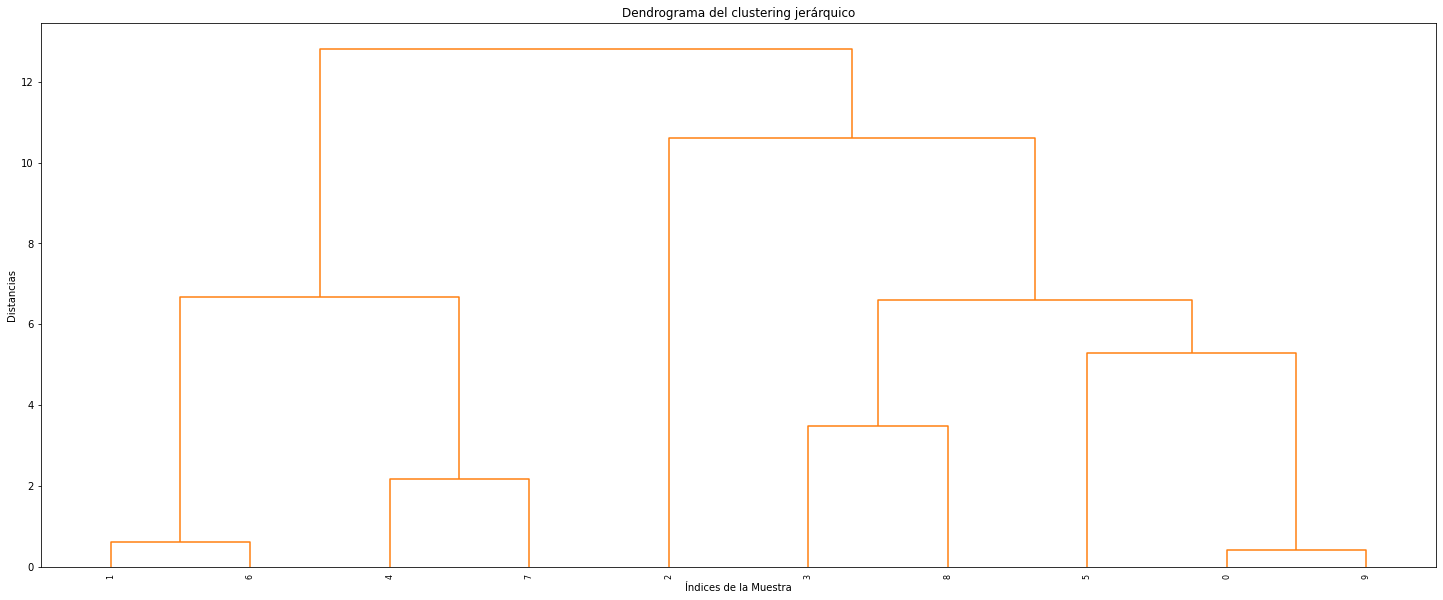

In [420]:
Z = linkage(data, "ward")
plt.figure(figsize=(25,10))
plt.title("Dendrograma del clustering jerárquico")
plt.xlabel("Índices de la Muestra")
plt.ylabel("Distancias")
dendrogram(Z, leaf_rotation=90., leaf_font_size=8.0, color_threshold=0.7*180)
plt.show()

### Normalizando los datos.

In [421]:
data_norm = np.zeros((data.shape[0], data.shape[1]))
for col in range(data.shape[1]):
    data_norm[:,col] = (data[:,col] - data[:,col].mean()) / data[:,col].std()
data_norm

array([[-0.83997603, -0.11622047, -0.98229819],
       [-0.37332268,  0.97761925,  1.03803142],
       [ 2.37474706, -0.7656878 ,  1.7346968 ],
       [ 1.44144035, -1.62025008, -1.08679799],
       [-0.68442492,  1.04598423, -0.80813184],
       [-0.16592119, -0.52641036,  0.55036565],
       [-0.42517305,  1.01180174,  1.24703103],
       [-0.5288738 ,  1.38780914, -0.14629973],
       [-0.11407082, -1.21006019, -0.6339655 ],
       [-0.68442492, -0.18458545, -0.91263165]])

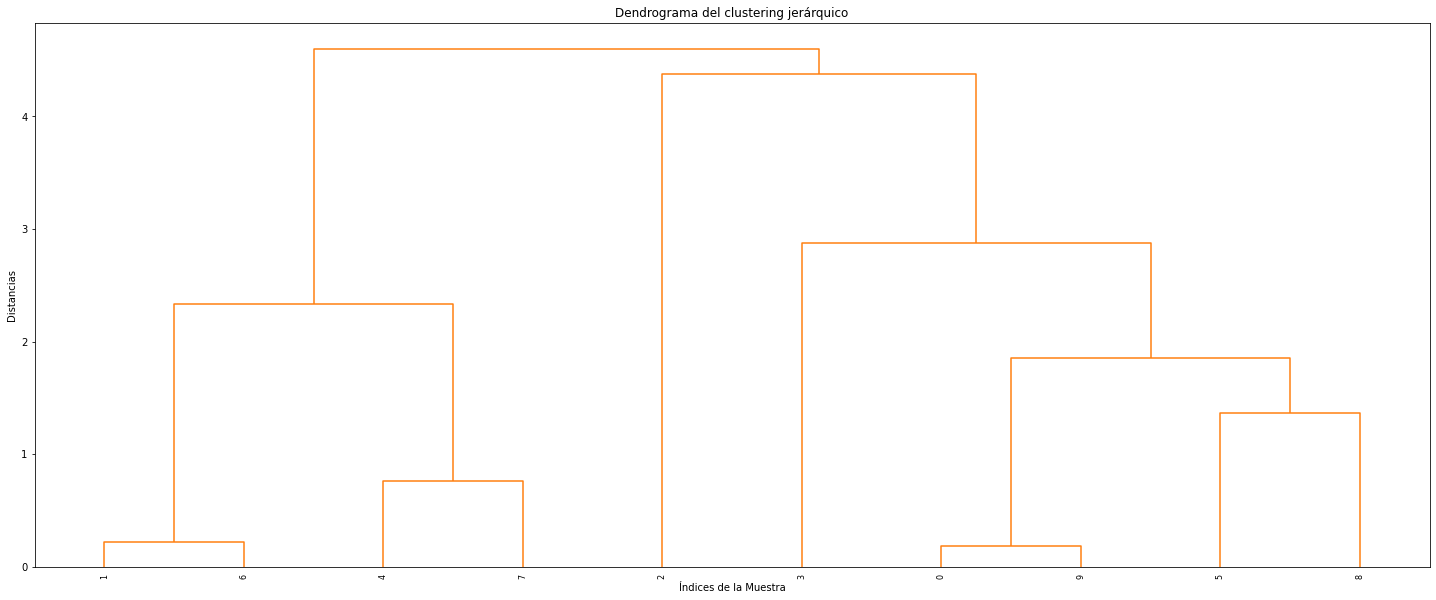

In [422]:
Z = linkage(data_norm, "ward")
plt.figure(figsize=(25,10))
plt.title("Dendrograma del clustering jerárquico")
plt.xlabel("Índices de la Muestra")
plt.ylabel("Distancias")
dendrogram(Z, leaf_rotation=90., leaf_font_size=8.0, color_threshold=0.7*180)
plt.show()

i) ¿Que diferencias puede encontrar en los resultados previos?.
Podemos ver que al normalizar las variables los dendrogramas se apachurran en el eje y, es decir, la altura de los rectuangulos se hacen más pequeñas, pero sigue conservando el mismo orden en eje x.

ii) ¿En qué casos resulta importante llevar a cabo un proceso de normalización del rango
de datos?.
Es muy importante cuando el rango de los datos es superior a los demas, ya que esto puede sesgar a los dato pequeños.

iii) Consulte los diferentes tipos de distancias que se pueden usar como parámetro en el
método “linkage”, ¿qué características de los datos se podría basar uno para elegir una
determinada distancia?.

Existen otros tipos de enlazamiento, cada uno resuelve soluciones distintas: 

- Single linkage: utiliza la distancia más corta entre dos vectores de cada grupo.
- Complete linkage: toma en cuenta la distancia más grande entre dos vectores de cada grupo.
- Average linkage: usa la distancia promedio entre todos los vectores de cada grupo.
- Ward linkage: la distancia es la suma de las diferencias al cuadrado en los grupos.

### Referencias
- https://docs.scipy.org/doc/scipy/reference/spatial.distance.html
- https://www.encyclopedia-titanica.org/
- https://www.kaggle.com/vinicius150987/titanic3